In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.a2c_models as models

from pytorch_drl.algs.acktr import ACKTR

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## 1. Define Utils:

### 1.1 Plotting:

In [3]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[0]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

In [4]:
def copy_network(network1, network2):
    network2.load_state_dict(network1.state_dict())

## 2. Create environment

In [5]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 3. Define networks for different algorithms

In [6]:
model_c = models.A2CNetwork
model_a = (state_size, action_size)

## 4. ACKTR Test

State size: 4 
Action size: 2
AVG score is 195.3, i: 2475                    Solved! Episode 2475


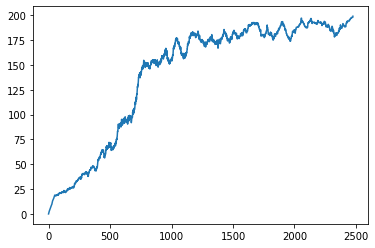

In [17]:
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

tmax = 5
n_traj = (20_000)//tmax
n_env = 16

a2c_model = models.A2CNetwork(state_size, action_size)

# init agent:
agent = ACKTR(model_c,
            model_a,
            env_name,
            n_env=n_env,
            )
# train the agent
scores, losses = agent.train(tmax, n_traj,  env)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
#losses = mean_filter(losses, 50)
plt.plot(x, scores, label = "scores")
#plt.plot(x, losses, label = "losses")
#plt.legend()
plt.show()

### 4.1 Trained Agent Demonstration

In [19]:
tester.test_agent(agent, env, max_t=200, render=True, num_of_episodes=5, log=True)

200.0
200.0
200.0
200.0
200.0


200.0

## 5. ACKTR Continuous Test


### 5.1 Trained Agent Demonstration